# A Little Book of Python for Multivariate Analysis

This booklet tells you how to use the Python ecosystem to carry out some simple multivariate analyses, with a focus on principal components analysis (PCA) and linear discriminant analysis (LDA).

This booklet assumes that the reader has some basic knowledge of multivariate analyses, and the principal focus of the booklet is not to explain multivariate analyses, but rather to explain how to carry out these analyses using Python.

If you are new to multivariate analysis, and want to learn more about any of the concepts presented here, there are a number of good resources, such as for example Multivariate Data Analysis by Hair et. al. or Applied Multivariate Data Analysis by Everitt and Dunn.

In the examples in this booklet, I will be using data sets from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml).

## Setting up the python environment

### Install Python

Although there are a number of ways of getting Python to your system, for a hassle free install and quick start using, I highly recommend downloading and installing [Anaconda](https://www.continuum.io/downloads) by [Continuum](https://www.continuum.io), which is a Python distribution that contains the core packages plus a large number of packages for scientific computing and tools to easily update them, install new ones, create virtual environments, and provide IDEs such as this one, the [Jupyter notebook](https://jupyter.org) (formerly known as ipython notebook).

This notebook was created with python 2.7 version. For exact details, including versions of the other libraries, see the `%watermark` directive below.


### Libraries

[Python](https://en.wikipedia.org/wiki/Python_%28programming_language%29) can typically do less out of the box than other languages, and this is due to being a genaral programming language taking a more modular approach, relying on other packages for specialized tasks.

The following libraries are used here:

* [pandas](http://pandas.pydata.org): The Python Data Analysis Library is used for storing the data in dataframes and manipulation.
* [numpy](http://www.numpy.org): Python scientific computing library.
* [matplotlib](http://matplotlib.org): Python plotting library.
* [seaborn](http://stanford.edu/~mwaskom/software/seaborn/): Statistical data visualization based on matplotlib.
* [scikit-learn](http://scikit-learn.org/stable/): Sklearn is a machine learning library for Python.
* [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html): Provides a number of probability distributions and statistical functions.

These should have been installed for you if you have installed the Anaconda Python distribution.

The libraries versions are:

In [13]:
from __future__ import print_function, division  # for compatibility with python 3.x
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

#Ram %install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py
%load_ext watermark

%watermark -v -m -p pandas,numpy,matplotlib,seaborn,sklearn,scipy -g


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.5.4
IPython 6.1.0

pandas 0.20.3
numpy 1.13.1
matplotlib 2.0.2
seaborn 0.8.0
sklearn 0.19.0
scipy 0.19.1

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 3.10.0-514.26.2.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : ffe63bba8365aa8b16af6bf9160eee68b5c1d4b7


### Importing the libraries

In [14]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

### Python console

A useful tool to have aside a notebook for quick experimentation and data visualization is a python console attached. Uncomment the following line if you wish to have one.

In [15]:
# %qtconsole

## Reading Multivariate Analysis Data into Python

The first thing that you will want to do to analyse your multivariate data will be to read it into Python, and to plot the data. For data analysis an I will be using the [Python Data Analysis Library](http://pandas.pydata.org) (pandas, imported as `pd`), which provides a number of useful functions for reading and analyzing the data, as well as a `DataFrame` storage structure, similar to that found in other popular data analytics languages, such as R.

For example, the file numerai_training_data.csv from https://numer.ai/leaderboard contains financial time series data on valuess of 21 different features of unknown nature.

numerai_training_data.csv Use this dataset to train your machine learning algorithm. The target column (last one) is the binary class you are trying to predict. The id, era and data_type columns (1,2,3 columns) are meta data, not features. All other columns are features (21 features).

numerai_tournament_data.csv Use your model to generate probability estimates on this dataset to submit to Numerai. This dataset contains validation data with targets, test data without targets, and live data without targets.The data set looks like this:

```
id	era	data_type	feature1	feature2	feature3	feature4	feature5	feature6	feature7	feature8	feature9	feature10	feature11	feature12	feature13	feature14	feature15	feature16	feature17	feature18	feature19	feature20	feature21	target
119763	era1	train	0.28305	0.52361	0.69209	0.44205	0.43505	0.76235	0.31014	0.6999	0.32579	0.72926	0.33439	0.41445	0.30291	0.56754	0.41035	0.3054	0.70217	0.67645	0.33197	0.62004	0.40567	0
45906	era1	train	0.72306	0.55033	0.39225	0.6303	0.56429	0.33871	0.4831	0.29581	0.60988	0.49206	0.60155	0.62379	0.6385	0.44519	0.40625	0.6302	0.36515	0.39648	0.49776	0.37858	0.41617	1
139896	era1	train	0.29881	0.4836	0.74775	0.35139	0.3459	0.59046	0.47939	0.6748	0.20389	0.64569	0.27525	0.36862	0.25399	0.69524	0.54931	0.24025	0.73879	0.74283	0.46221	0.61501	0.44855	0
116826	era1	train	0.51999	0.62361	0.5529	0.5379	0.45459	0.48424	0.55901	0.44721	0.26035	0.61347	0.47019	0.56532	0.45956	0.64501	0.63455	0.41849	0.53119	0.54691	0.58776	0.39615	0.32122	1
28656	era1	train	0.47968	0.56531	0.5887	0.44709	0.43121	0.48611	0.53326	0.52356	0.30413	0.62464	0.40931	0.48232	0.41466	0.63677	0.53184	0.41226	0.5717	0.60222	0.48431	0.50111	0.40677	1
46882	era1	train	0.56606	0.33076	0.64089	0.42305	0.35935	0.35807	0.56341	0.40425	0.57429	0.32811	0.3621	0.36072	0.42347	0.58581	0.43622	0.42998	0.58806	0.63282	0.53618	0.57049	0.63208	0
122576	era1	train	0.52572	0.58291	0.55984	0.56405	0.45821	0.51928	0.52253	0.42849	0.31066	0.55531	0.47407	0.5523	0.46665	0.60435	0.60084	0.41892	0.53452	0.53926	0.58293	0.40478	0.35244	1
91717	era1	train	0.7113	0.93503	0.28506	0.77536	0.66179	0.64449	0.56403	0.28137	0.15377	0.75289	0.73213	0.83538	0.70692	0.5561	0.71476	0.63258	0.27376	0.28701	0.62515	0.14051	0.07044	1
130618	era1	train	0.49799	0.62096	0.56384	0.48189	0.46138	0.60828	0.54611	0.49099	0.23214	0.63445	0.44492	0.51252	0.44548	0.64106	0.59172	0.41474	0.54424	0.569	0.53701	0.45458	0.36733	1

...
```

There is one row per sample. The first column contains the id of a sample (labelled as integer), the second and and the following thirteen columns contain the concentrations of the 13 different chemicals in that sample. The columns are separated by commas, i.e. it is a comma-separated (csv) file without a header row.

The data can be read in a pandas dataframe using the `read_csv()` function. The argument `header=None` tells the function that there is no header in the beginning of the file.<a id='read_data'></a>

In [83]:
data = pd.read_csv("/home/parrondo/projects/research/ejemplo/data/raw/2017week32/numerai_datasets/numerai_training_data.csv", header=0)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
#Features
X = data.loc[:, "V4":"V24"]  # independent variables data
#Target
data.V25 = data.V25.astype(str) #Ram target: for comparison efect is better "str"
y = data.V25  # dependent/target variable data
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,119763,era1,train,0.28305,0.52361,0.69209,0.44205,0.43505,0.76235,0.31014,...,0.30291,0.56754,0.41035,0.30540,0.70217,0.67645,0.33197,0.62004,0.40567,0
1,45906,era1,train,0.72306,0.55033,0.39225,0.63030,0.56429,0.33871,0.48310,...,0.63850,0.44519,0.40625,0.63020,0.36515,0.39648,0.49776,0.37858,0.41617,1
2,139896,era1,train,0.29881,0.48360,0.74775,0.35139,0.34590,0.59046,0.47939,...,0.25399,0.69524,0.54931,0.24025,0.73879,0.74283,0.46221,0.61501,0.44855,0
3,116826,era1,train,0.51999,0.62361,0.55290,0.53790,0.45459,0.48424,0.55901,...,0.45956,0.64501,0.63455,0.41849,0.53119,0.54691,0.58776,0.39615,0.32122,1
4,28656,era1,train,0.47968,0.56531,0.58870,0.44709,0.43121,0.48611,0.53326,...,0.41466,0.63677,0.53184,0.41226,0.57170,0.60222,0.48431,0.50111,0.40677,1
5,46882,era1,train,0.56606,0.33076,0.64089,0.42305,0.35935,0.35807,0.56341,...,0.42347,0.58581,0.43622,0.42998,0.58806,0.63282,0.53618,0.57049,0.63208,0
6,122576,era1,train,0.52572,0.58291,0.55984,0.56405,0.45821,0.51928,0.52253,...,0.46665,0.60435,0.60084,0.41892,0.53452,0.53926,0.58293,0.40478,0.35244,1
7,91717,era1,train,0.71130,0.93503,0.28506,0.77536,0.66179,0.64449,0.56403,...,0.70692,0.55610,0.71476,0.63258,0.27376,0.28701,0.62515,0.14051,0.07044,1
8,130618,era1,train,0.49799,0.62096,0.56384,0.48189,0.46138,0.60828,0.54611,...,0.44548,0.64106,0.59172,0.41474,0.54424,0.56900,0.53701,0.45458,0.36733,1
9,66733,era1,train,0.51398,0.60211,0.55871,0.45580,0.44696,0.51284,0.56540,...,0.44536,0.64554,0.55563,0.44078,0.53807,0.57801,0.50520,0.47426,0.39343,1


In this case the data on 108405 samples of 21 features has been read into the variable `data`.

## Plotting Multivariate Data

Once you have read a multivariate data set into python, the next step is usually to make a plot of the data.

### A Matrix Scatterplot

One common way of plotting multivariate data is to make a *matrix scatterplot*, showing each pair of variables plotted against each other. We can use the `scatter_matrix()` function from the `pandas.tools.plotting` package to do this.

To use the `scatter_matrix()` function, you need to give it as its input the variables that you want included in the plot. Say for example, that we just want to include the variables corresponding to the values of the first five features. These are stored in columns V4-V8 of the variable `data`. The parameter `diagonal` allows us to specify whether to plot a histogram (`"hist"`) or a Kernel Density Estimation (`"kde"`) for the variable. We can extract just these columns from the variable `data` by typing:

In [32]:
data.loc[:, "V4":"V8"]

,V4,V5,V6,V7,V8
0,0.28305,0.52361,0.69209,0.44205,0.43505
1,0.72306,0.55033,0.39225,0.63030,0.56429
2,0.29881,0.48360,0.74775,0.35139,0.34590
3,0.51999,0.62361,0.55290,0.53790,0.45459
4,0.47968,0.56531,0.58870,0.44709,0.43121
5,0.56606,0.33076,0.64089,0.42305,0.35935
6,0.52572,0.58291,0.55984,0.56405,0.45821
7,0.71130,0.93503,0.28506,0.77536,0.66179
8,0.49799,0.62096,0.56384,0.48189,0.46138
9,0.51398,0.60211,0.55871,0.45580,0.44696


To make a matrix scatterplot of just these 5 variables using the `scatter_matrix()` function we type:

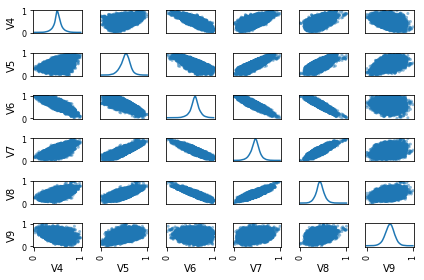

In [63]:
pd.plotting.scatter_matrix(data.loc[:, "V4":"V9"], diagonal="kde")
plt.tight_layout()
plt.show()

In this matrix scatterplot, the diagonal cells show histograms of each of the variables, in this case the values of the first five features (variables V4, V5, V6, V7, V8).

Each of the off-diagonal cells is a scatterplot of two of the five featuress, for example, the second cell in the first row is a scatterplot of V4 (y-axis) against V5 (x-axis).

### A Scatterplot with the Data Points Labelled by their Group

If you see an interesting scatterplot for two variables in the matrix scatterplot, you may want to plot that scatterplot in more detail, with the data points labelled by their group (their cultivar in this case).

For example, in the matrix scatterplot above, the cell in the third column of the fourth row down is a scatterplot of V7 (x-axis) against V6 (y-axis). If you look at this scatterplot, it appears that there may be a negative relationship between V7 and V6.

We may therefore decide to examine the relationship between `V7` and `V6` more closely, by plotting a scatterplot of these two variables, with the data points labelled by their group (their binary target). To plot a scatterplot of two variables, we can use the `lmplot` function from the `seaborn` package. The V6 and V7 variables are stored in the columns V6 and V7 of the variable `data`. The first two parameters in the `lmplot()` function are the columns to be plotted against each other in x-y, the third parameter specifies the data, the `hue` parameter is the column name used for the labels of the datapoints, i.e. the classes they belong to, lastly, the `fit_reg` parameter is set to `False` when we do not want to plot a regression model relating to the x-y variables. Therefore, to plot the scatterplot, we type:

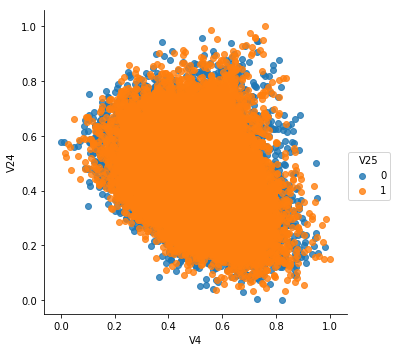

In [105]:
sns.lmplot("V4", "V24", data, hue="V25", fit_reg=False);

We can see from the scatterplot of V7 versus V6 that the samples from target 0 seem to have lower values of V7 compared to the samples of target 1 unless in ther lower border, but it is very unclear.

### A Profile Plot

Another type of plot that is useful is a *profile plot*, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

This can be achieved using `pandas` plot facilities, which are built upon `matplotlib`, by running the following:

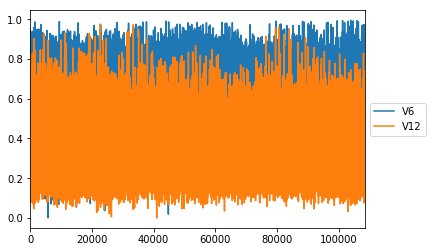

In [65]:
ax = data[["V6","V12"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

It is clear from the profile plot that the mean for V6 is  higher than that for the other variable V12.

## Calculating Summary Statistics for Multivariate Data

Another thing that you are likely to want to do is to calculate summary statistics such as the mean and standard deviation for each of the variables in your multivariate data set.

This is easy to do, using the `mean()` and `std()` functions in `numpy` and applying them to the dataframe using its member function `apply`.

<p><div class="alert alert-success">
Pandas allows to do simple operations directly calling them as methods, for example we could do compute the means of a dataframe `df` by calling `df.mean()`.

An alternative option is to use the `apply` method of the `pandas.DataFrame` class, which applies the passed argument function along the input axis of the DataFrame. This method is powerful as it allows passing any function we want to be applied in our data.
</div></p>

For example, say we want to calculate the mean and standard deviations of each of the 21 features in the samples. These are stored in columns V4-V24 of the variable `data`, which has been previously assigned to `X` for convenience. So we type:

In [66]:
X.apply(np.mean)

V4     0.500489
V5     0.530777
V6     0.593131
V7     0.463543
V8     0.430014
V9     0.500072
V10    0.533695
V11    0.484669
V12    0.339848
V13    0.565529
         ...   
V15    0.475409
V16    0.426605
V17    0.622671
V18    0.539131
V19    0.407971
V20    0.568731
V21    0.594192
V22    0.525519
V23    0.493394
V24    0.433121
Length: 21, dtype: float64

This tells us that the mean of variable V6 is 0.593131, the mean of V12 is 0.339848, and so on.

Similarly, to get the standard deviations of the 21 features, we type:

In [67]:
X.apply(np.std)

V4     0.090129
V5     0.104437
V6     0.098372
V7     0.096387
V8     0.087957
V9     0.102222
V10    0.098016
V11    0.087952
V12    0.098976
V13    0.095980
         ...   
V15    0.103579
V16    0.092865
V17    0.088379
V18    0.093146
V19    0.087795
V20    0.092836
V21    0.097566
V22    0.089129
V23    0.090487
V24    0.104712
Length: 21, dtype: float64

We can see here that it would make sense to standardise in order to compare the variables because the variables have very different standard deviations - the standard deviation of V14 is 314.021657, while the standard deviation of V9 is just 0.124103. Thus, in order to compare the variables, we need to standardise each variable so that it has a sample variance of 1 and sample mean of 0. We will explain below how to standardise the variables.

### Means and Variances Per Group

It is often interesting to calculate the means and standard deviations for just the samples from a particular group, for example, for the wine samples from each cultivar. The cultivar is stored in the column V1 of the variable `data`, which has been previously assigned to `y` for convenience.

To extract out the data for just cultivar 2, we can type:

In [86]:
class2data = data[y=="1"]

We can then calculate the mean and standard deviations of the 13 chemicals' concentrations, for just the cultivar 2 samples:

In [90]:
class2data.loc[:, "V4":"V24"].apply(np.mean)

V4     0.500550
V5     0.529320
V6     0.593955
V7     0.462262
V8     0.428948
V9     0.499796
V10    0.534423
V11    0.484749
V12    0.341020
V13    0.563878
         ...   
V15    0.473548
V16    0.426039
V17    0.622977
V18    0.538042
V19    0.408089
V20    0.569288
V21    0.595200
V22    0.524798
V23    0.494794
V24    0.435256
Length: 21, dtype: float64

In [91]:
class2data.loc[:, "V4":"V24"].apply(np.std)

V4     0.090222
V5     0.105169
V6     0.098741
V7     0.096968
V8     0.088324
V9     0.101961
V10    0.098021
V11    0.088052
V12    0.098924
V13    0.096332
         ...   
V15    0.104324
V16    0.093198
V17    0.088364
V18    0.092688
V19    0.087802
V20    0.093161
V21    0.098057
V22    0.088490
V23    0.091041
V24    0.105499
Length: 21, dtype: float64

You can calculate the mean and standard deviation of the 13 chemicals' concentrations for just cultivar 1 samples, or for just cultivar 3 samples, in a similar way.

However, for convenience, you might want to use the function `printMeanAndSdByGroup()` below, which prints out the mean and standard deviation of the variables for each group in your data set:

In [92]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

The arguments of the function are the variables that you want to calculate means and standard deviations for (`X`), and the variable containing the group of each sample (`y`). For example, to calculate the mean and standard deviation for each of the 13 chemical concentrations, for each of the three different wine cultivars, we type:

In [93]:
printMeanAndSdByGroup(X, y)

## Means:


,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
V25,,,,,,,,,,,,,,,,,,,,,
0,0.500428,0.532258,0.592294,0.464846,0.431098,0.500353,0.532955,0.484587,0.338656,0.567207,...,0.477301,0.427180,0.622361,0.540238,0.407851,0.568164,0.593166,0.526252,0.491971,0.430949
1,0.500550,0.529320,0.593955,0.462262,0.428948,0.499796,0.534423,0.484749,0.341020,0.563878,...,0.473548,0.426039,0.622977,0.538042,0.408089,0.569288,0.595200,0.524798,0.494794,0.435256



## Standard deviations:


,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
V25,,,,,,,,,,,,,,,,,,,,,
0,0.090035,0.103667,0.097988,0.095774,0.087569,0.102487,0.098005,0.087850,0.099014,0.095592,...,0.102783,0.092523,0.088393,0.093595,0.087787,0.092502,0.097054,0.089768,0.089897,0.103861
1,0.090222,0.105169,0.098741,0.096968,0.088324,0.101961,0.098021,0.088052,0.098924,0.096332,...,0.104324,0.093198,0.088364,0.092688,0.087802,0.093161,0.098057,0.088490,0.091041,0.105499



## Sample sizes:


,0
V25,
0,53749
1,54656


The function `printMeanAndSdByGroup()` also prints out the number of samples in each group. In this case, we see that there are 59 samples of cultivar 1, 71 of cultivar 2, and 48 of cultivar 3.

### Between-groups Variance and Within-groups Variance for a Variable

If we want to calculate the within-groups variance for a particular variable (for example, for a particular chemical’s concentration), we can use the function `calcWithinGroupsVariance()` below:

In [94]:
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

The `variable` parameter of the function `calcWithinGroupsVariance()` is the input variable for which we wish to compute its within-groups variance for the groups given in `groupvariable`.

So for example, to calculate the within-groups variance of the variable V4 (the concentration of the first chemical), we type:

In [96]:
calcWithinGroupsVariance(X.V4, y)

0.008123405516384052

Thus, the within-groups variance for V2 is 0.2620525.

We can calculate the between-groups variance for a particular variable (eg. V2) using the function `calcBetweenGroupsVariance()` below:

In [97]:
def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = numtotal / (numlevels - 1)
    return(Vb)

Similarly to the parameters of the function `calcWithinGroupsVariance()`, the `variable` parameter of the function `calcBetweenGroupsVariance()` is the input variable for which we wish to compute its between-groups variance for the groups given in `groupvariable`.

So for example, to calculate the between-groups variance of the variable V2 (the concentration of the first chemical), we type:

In [99]:
calcBetweenGroupsVariance(X.V4, y)

0.00040087150270326532

Thus, the between-groups variance of V2 is 35.397425.

We can calculate the *separation* achieved by a variable as its between-groups variance devided by its within-groups variance. Thus, the separation achieved by V2 is calculated as:

In [101]:
# 35.397424960269106 / 0.2620524691539065
calcBetweenGroupsVariance(X.V4, y) / calcWithinGroupsVariance(X.V4, y)

0.049347715301759805

If you want to calculate the separations achieved by all of the variables in a multivariate data set, you can use the function `calcSeparations()` below:

In [102]:
def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb/Vw
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

For example, to calculate the separations for each of the 13 chemical concentrations, we type:

In [103]:
calcSeparations(X, y)

variable V4 Vw= 0.00812340551638 Vb= 0.000400871502703 separation= 0.0493477153018
variable V5 Vw= 0.0109051565056 Vb= 0.233917622004 separation= 21.4501847712
variable V6 Vw= 0.00967648564871 Vb= 0.0747065665883 separation= 7.72042343682
variable V7 Vw= 0.00928888685739 Vb= 0.180999873937 separation= 19.4856366231
variable V8 Vw= 0.00773545366809 Vb= 0.125271911146 separation= 16.194513796
variable V9 Vw= 0.0104495420441 Vb= 0.00840534072685 separation= 0.804374076046
variable V10 Vw= 0.00960677325826 Vb= 0.0583440126026 separation= 6.07321636872
variable V11 Vw= 0.00773565495062 Vb= 0.000710937782119 separation= 0.091904019331
variable V12 Vw= 0.00979499110723 Vb= 0.151425045499 separation= 15.459436751
variable V13 Vw= 0.00920958602994 Vb= 0.300496161679 separation= 32.628628551
variable V14 Vw= 0.00947194465525 Vb= 0.157190088954 separation= 16.5953343981
variable V15 Vw= 0.0107253840219 Vb= 0.38173915996 separation= 35.5921204482
variable V16 Vw= 0.00862381051272 Vb= 0.03529696927

Thus, the individual variable which gives the greatest separations between the groups (the wine cultivars) is V8 (separation 233.9). As we will discuss below, the purpose of linear discriminant analysis (LDA) is to find the linear combination of the individual variables that will give the greatest separation between the groups (cultivars here). This hopefully will give a better separation than the best separation achievable by any individual variable (233.9 for V8 here).

### Between-groups Covariance and Within-groups Covariance for Two Variables

If you have a multivariate data set with several variables describing sampling units from different groups, such as the wine samples from different cultivars, it is often of interest to calculate the within-groups covariance and between-groups variance for pairs of the variables.

This can be done using the following functions:

In [23]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

For example, to calculate the within-groups covariance for variables V8 and V11, we type:

In [24]:
calcWithinGroupsCovariance(X.V8, X.V11, y)

0.28667830215140183

In [25]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

For example, to calculate the between-groups covariance for variables V8 and V11, we type:

In [26]:
calcBetweenGroupsCovariance(X.V8, X.V11, y)

-60.4107748359163

Thus, for V8 and V11, the between-groups covariance is -60.41 and the within-groups covariance is 0.29. Since the within-groups covariance is positive (0.29), it means V8 and V11 are positively related within groups: for individuals from the same group, individuals with a high value of V8 tend to have a high value of V11, and vice versa. Since the between-groups covariance is negative (-60.41), V8 and V11 are negatively related between groups: groups with a high mean value of V8 tend to have a low mean value of V11, and vice versa.

### Calculating Correlations for Multivariate Data¶

It is often of interest to investigate whether any of the variables in a multivariate data set are significantly correlated.

To calculate the linear (Pearson) correlation coefficient for a pair of variables, you can use the `pearsonr()` function from `scipy.stats` package. For example, to calculate the correlation coefficient for the first two chemicals’ concentrations, V2 and V3, we type:

In [106]:
corr = stats.pearsonr(X.V4, X.V5)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.0
cor:		 0.326717384007


This tells us that the correlation coefficient is about 0.094, which is a very weak correlation. Furthermore, the *p-value* for the statistical test of whether the correlation coefficient is significantly different from zero is 0.21. This is much greater than 0.05 (which we can use here as a cutoff for statistical significance), so there is very weak evidence that that the correlation is non-zero.

If you have a lot of variables, you can use the `pandas.DataFrame` method `corr()` to calculate a correlation matrix that shows the correlation coefficient for each pair of variables.

In [107]:
corrmat = X.corr()
corrmat

,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
V4,1.000000,0.326717,-0.778413,0.588383,0.524918,-0.328860,0.201881,-0.945974,0.490422,-0.230516,...,0.572305,0.881462,-0.395741,-0.000474,0.873620,-0.876611,-0.755403,0.312857,-0.685987,-0.198138
V5,0.326717,1.000000,-0.738175,0.843964,0.723536,0.489931,-0.256211,-0.262308,-0.472720,0.746690,...,0.885903,0.641691,-0.345659,0.221913,0.574954,-0.681600,-0.749202,-0.098831,-0.844166,-0.962432
V6,-0.778413,-0.738175,1.000000,-0.906656,-0.928212,-0.156903,0.345072,0.613568,-0.222054,-0.408233,...,-0.920746,-0.979176,0.741818,0.211375,-0.952447,0.982656,0.992738,0.162953,0.811425,0.668620
V7,0.588383,0.843964,-0.906656,1.000000,0.882611,0.313064,-0.399929,-0.505344,-0.019622,0.520650,...,0.970026,0.866666,-0.658962,-0.037118,0.790839,-0.868328,-0.942390,-0.118571,-0.887026,-0.844860
V8,0.524918,0.723536,-0.928212,0.882611,1.000000,0.402002,-0.651543,-0.316347,0.154970,0.617079,...,0.898690,0.857429,-0.879494,-0.397046,0.814676,-0.849104,-0.937495,-0.425427,-0.655364,-0.708804
V9,-0.328860,0.489931,-0.156903,0.313064,0.402002,1.000000,-0.568612,0.396509,-0.497930,0.654862,...,0.268492,0.048317,-0.307727,-0.136844,-0.005779,-0.044529,-0.196344,-0.473483,-0.093739,-0.474064
V10,0.201881,-0.256211,0.345072,-0.399929,-0.651543,-0.568612,1.000000,-0.427376,-0.136367,-0.666174,...,-0.384634,-0.212906,0.813281,0.741927,-0.214090,0.182136,0.374331,0.864699,-0.040709,0.361368
V11,-0.945974,-0.262308,0.613568,-0.505344,-0.316347,0.396509,-0.427376,1.000000,-0.362379,0.385329,...,-0.465434,-0.749867,0.145714,-0.269883,-0.705466,0.745296,0.610420,-0.579286,0.702171,0.150588
V12,0.490422,-0.472720,-0.222054,-0.019622,0.154970,-0.497930,-0.136367,-0.362379,1.000000,-0.506078,...,-0.084724,0.321599,-0.489860,-0.658908,0.417523,-0.271080,-0.196371,-0.170135,0.187192,0.500394
V13,-0.230516,0.746690,-0.408233,0.520650,0.617079,0.654862,-0.666174,0.385329,-0.506078,1.000000,...,0.612398,0.220837,-0.416410,-0.142220,0.184432,-0.251745,-0.415969,-0.571792,-0.335139,-0.807700


A better graphical representation of the correlation matrix is via a correlation matrix plot in the form of a *heatmap*.

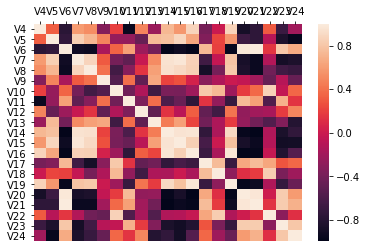

In [108]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

Or an alternative nice visualization is via a Hinton diagram. The color of the boxes determines the sign of the correlation, in this case red for positive and blue for negative correlations; while the size of the boxes determines their magnitude, the bigger the box the higher the magnitude.

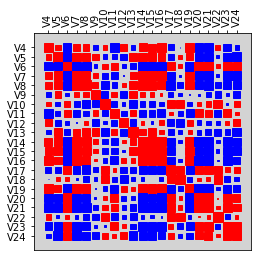

In [109]:
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

Although the correlation matrix and diagrams are useful for quickly looking to identify the strongest correlations, they still require labor work to find the top `N` strongest correlations. For this you can use the function `mosthighlycorrelated()` below.

The function `mosthighlycorrelated()` will print out the linear correlation coefficients for each pair of variables in your data set, in order of the correlation coefficient. This lets you see very easily which pair of variables are most highly correlated.

In [110]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

The arguments of the function are the variables that you want to calculate the correlations for, and the number of top correlation coefficients to print out (for example, you can tell it to print out the largest 10 correlation coefficients, or the largest 20).

For example, to calculate correlation coefficients between the concentrations of the 13 chemicals in the wine samples, and to print out the top 10 pairwise correlation coefficients, you can type:

In [112]:
mosthighlycorrelated(X, 20)

,FirstVariable,SecondVariable,Correlation
0,V14,V21,-0.998092
1,V16,V20,-0.996368
2,V6,V21,0.992738
3,V6,V14,-0.987903
4,V6,V20,0.982656
5,V6,V16,-0.979176
6,V16,V21,-0.973674
7,V20,V21,0.971626
8,V19,V20,-0.971515
9,V7,V15,0.970026


This tells us that the pair of variables with the highest linear correlation coefficient are V7 and V8 (correlation = 0.86 approximately).

### Standardising Variables

If you want to compare different variables that have different units, are very different variances, it is a good idea to first standardise the variables.

For example, we found above that the concentrations of the 13 chemicals in the wine samples show a wide range of standard deviations, from 0.124103 for V9 (variance 0.015402) to 314.021657 for V14 (variance 98609.60). This is a range of approximately 6,402,389-fold in the variances.

As a result, it is not a good idea to use the unstandardised chemical concentrations as the input for a principal component analysis (PCA, see below) of the wine samples, as if you did that, the first principal component would be dominated by the variables which show the largest variances, such as V14.

Thus, it would be a better idea to first standardise the variables so that they all have variance 1 and mean 0, and to then carry out the principal component analysis on the standardised data. This would allow us to find the principal components that provide the best low-dimensional representation of the variation in the original data, without being overly biased by those variables that show the most variance in the original data.

You can standardise variables by using the `scale()` function from the package `sklearn.preprocessing`.

For example, to standardise the concentrations of the 13 chemicals in the wine samples, we type:

In [113]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

In [114]:
standardisedX.apply(np.mean)

V4    -4.588164e-18
V5    -6.972043e-16
V6    -1.277935e-15
V7     9.640552e-16
V8    -2.191176e-16
V9     2.554296e-16
V10   -3.532231e-16
V11    1.415776e-16
V12   -8.508914e-16
V13   -5.735205e-17
           ...     
V15   -7.616352e-16
V16    4.432494e-16
V17   -1.634042e-15
V18    2.538238e-16
V19    1.063471e-16
V20    3.019012e-16
V21   -3.391964e-16
V22   -2.145294e-16
V23   -1.434129e-16
V24   -2.342913e-16
Length: 21, dtype: float64

In [115]:
standardisedX.apply(np.std)

V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
      ... 
V15    1.0
V16    1.0
V17    1.0
V18    1.0
V19    1.0
V20    1.0
V21    1.0
V22    1.0
V23    1.0
V24    1.0
Length: 21, dtype: float64

## Principal Component Analysis

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the case of the wine data set, we have 13 chemical concentrations describing wine samples from three different cultivars. We can carry out a principal component analysis to investigate whether we can capture most of the variation between samples using a smaller number of new variables (principal components), where each of these new variables is a linear combination of all or some of the 13 chemical concentrations.

To carry out a principal component analysis (PCA) on a multivariate data set, the first step is often to standardise the variables under study using the `scale()` function (see above). This is necessary if the input variables have very different variances, which is true in this case as the concentrations of the 13 chemicals have very different variances (see above).

Once you have standardised your variables, you can carry out a principal component analysis using the `PCA` class from `sklearn.decomposition` package and its `fit` method, which fits the model with the data `X`. The default `solver` is Singular Value Decomposition ("svd"). For more information you can type `help(PCA)` in the python console.

For example, to standardise the concentrations of the 13 chemicals in the wine samples, and carry out a principal components analysis on the standardised concentrations, we type:

In [119]:
pca = PCA().fit(standardisedX)

You can get a summary of the principal component analysis results using the `pca_summary()` function below, which simulates the output of R's `summary` function on a PCA model:

In [120]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

The parameters of the `print_pca_summary` function are:
* `pca`: A PCA object
* `standardised_data`: The standardised data
* `out (True)`: Print to standard output

In [123]:
#summary = pca_summary(pca, standardisedX)
standardisedX

,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
0,-2.412531,-0.068626,1.005966,-0.222991,0.057257,2.565755,-2.280802,2.447147,-0.142033,1.705888,...,-0.588520,-1.331979,-0.623805,-1.382580,-1.168308,1.437360,0.843103,-2.171560,1.399607,-0.262152
1,2.469465,0.187222,-2.042065,1.730081,1.526608,-1.578541,-0.516192,-2.147301,2.728265,-0.765456,...,1.432536,2.281747,-2.008180,-1.426597,2.531235,-2.192899,-2.026443,-0.311446,-1.268849,-0.161877
2,-2.237670,-0.451727,1.571779,-1.163577,-0.956305,0.884226,-0.554043,2.161764,-1.373647,0.835188,...,-1.030983,-1.858763,0.821103,0.109278,-1.910380,1.831817,1.523463,-0.710306,1.344019,0.147351
3,0.216364,0.888888,-0.408974,0.771442,0.279410,-0.154881,0.258274,-0.425904,-0.803204,0.499493,...,0.868042,0.354871,0.252757,1.024405,0.119812,-0.404376,-0.484614,0.698328,-1.074677,-1.068648
4,-0.230883,0.330658,-0.045048,-0.170701,0.013599,-0.136587,-0.004439,0.442186,-0.360874,0.615871,...,0.066725,-0.128624,0.159523,-0.078278,0.048851,0.031984,0.082284,-0.462351,0.085271,-0.251647
5,0.727520,-1.915191,0.485491,-0.420113,-0.803389,-1.389150,0.303164,-0.914353,2.368682,-2.473622,...,-1.107253,-0.033756,-0.417083,-1.104842,0.250686,0.208208,0.395918,0.119615,0.852013,1.900059
6,0.279940,0.499180,-0.338425,1.042745,0.320567,0.187901,-0.113911,-0.638747,-0.294898,-0.106466,...,0.742342,0.431218,-0.207305,0.662498,0.124710,-0.368506,-0.563023,0.644137,-0.979304,-0.770498
7,2.338986,3.870778,-3.131707,3.235061,2.635102,1.412779,0.309490,-2.311482,-1.880033,1.952085,...,3.475316,3.018512,-0.753247,1.885530,2.558344,-3.177319,-3.148453,1.117833,-3.899841,-3.463593
8,-0.027730,0.863514,-0.297763,0.190345,0.356607,1.058551,0.126662,0.071869,-1.088224,0.718080,...,0.358289,0.203254,0.208064,0.564587,0.077099,-0.263806,-0.258203,0.128928,-0.428947,-0.628299
9,0.149682,0.683023,-0.349912,-0.080336,0.192663,0.124901,0.323467,0.098816,-0.580524,0.671716,...,0.230078,0.201962,0.258754,0.177129,0.373700,-0.330267,-0.165855,-0.227971,-0.211457,-0.379044


This gives us the standard deviation of each component, and the proportion of variance explained by each component. The standard deviation of the components is stored in a named row called `sdev` of the output variable made by the `pca_summary` function and stored in the `summary` variable:

In [39]:
summary.sdev

,Standard deviation
PC1,2.169297
PC2,1.580182
PC3,1.202527
PC4,0.958631
PC5,0.923704
PC6,0.801035
PC7,0.742313
PC8,0.590337
PC9,0.537476
PC10,0.500902


The total variance explained by the components is the sum of the variances of the components:

In [40]:
np.sum(summary.sdev**2)

Standard deviation    13
dtype: float64

In this case, we see that the total variance is 13, which is equal to the number of standardised variables (13 variables). This is because for standardised data, the variance of each standardised variable is 1. The total variance is equal to the sum of the variances of the individual variables, and since the variance of each standardised variable is 1, the total variance should be equal to the number of variables (13 here).

### Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot, which we can do using the `screeplot()` function below:

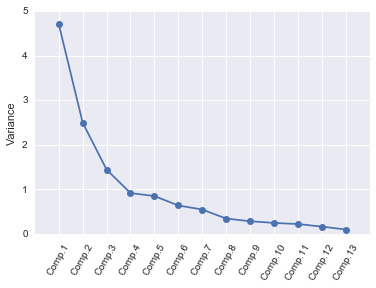

In [41]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

The most obvious change in slope in the scree plot occurs at component 4, which is the "elbow" of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

Another way of deciding how many components to retain is to use *Kaiser’s criterion*: that we should only retain principal components for which the variance is above 1 (when principal component analysis was applied to standardised data). We can check this by finding the variance of each of the principal components:

In [42]:
summary.sdev**2

,Standard deviation
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


We see that the variance is above 1 for principal components 1, 2, and 3 (which have variances 4.71, 2.50, and 1.45, respectively). Therefore, using Kaiser’s criterion, we would retain the first three principal components.

A third way to decide how many principal components to retain is to decide to keep the number of components required to explain at least some minimum amount of the total variance. For example, if it is important to explain at least 80% of the variance, we would retain the first five principal components, as we can see from cumulative proportions (`summary.cumprop`) that the first five principal components explain 80.2% of the variance (while the first four components explain just 73.6%, so are not sufficient).

### Loadings for the Principal Components

The loadings for the principal components are stored in a named element `components_` of the variable returned by `PCA().fit()`. This contains a matrix with the loadings of each principal component, where the first column in the matrix contains the loadings for the first principal component, the second column contains the loadings for the second principal component, and so on.

Therefore, to obtain the loadings for the first principal component in our analysis of the 13 chemical concentrations in wine samples, we type:

In [43]:
pca.components_[0]

array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
       -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
       -0.29671456, -0.37616741, -0.28675223])

This means that the first principal component is a linear combination of the variables:
```
-0.144*Z2 + 0.245*Z3 + 0.002*Z4 + 0.239*Z5 - 0.142*Z6 - 0.395*Z7 - 0.423*Z8 + 0.299*Z9 -0.313*Z10 + 0.089*Z11 - 0.297*Z12 - 0.376*Z13 - 0.287*Z14
```

where Z2, Z3, Z4, ..., Z14 are the standardised versions of the variables V2, V3, V4, ..., V14 (that each have mean of 0 and variance of 1).

Note that the square of the loadings sum to 1, as this is a constraint used in calculating the loadings:

In [44]:
np.sum(pca.components_[0]**2)

1.0000000000000004

To calculate the values of the first principal component, we can define our own function to calculate a principal component given the loadings and the input variables' values:

In [45]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

We can then use the function to calculate the values of the first principal component for each sample in our wine data:

In [46]:
calcpc(standardisedX, pca.components_[0])

array([-3.31675081, -2.20946492, -2.51674015, -3.75706561, -1.00890849,
       -3.05025392, -2.44908967, -2.05943687, -2.5108743 , -2.75362819,
       -3.47973668, -1.7547529 , -2.11346234, -3.45815682, -4.31278391,
       -2.3051882 , -2.17195527, -1.89897118, -3.54198508, -2.0845222 ,
       -3.12440254, -1.08657007, -2.53522408, -1.64498834, -1.76157587,
       -0.9900791 , -1.77527763, -1.23542396, -2.18840633, -2.25610898,
       -2.50022003, -2.67741105, -1.62857912, -1.90269086, -1.41038853,
       -1.90382623, -1.38486223, -1.12220741, -1.5021945 , -2.52980109,
       -2.58809543, -0.66848199, -3.07080699, -0.46220914, -2.10135193,
       -1.13616618, -2.72660096, -2.82133927, -2.00985085, -2.7074913 ,
       -3.21491747, -2.85895983, -3.50560436, -2.22479138, -2.14698782,
       -2.46932948, -2.74151791, -2.17374092, -3.13938015,  0.92858197,
        1.54248014,  1.83624976, -0.03060683, -2.05026161,  0.60968083,
       -0.90022784, -2.24850719, -0.18338403,  0.81280503, -1.97

In fact, the values of the first principal component are computed with the following, so we can compare those values to the ones that we calculated, and they should agree:

In [47]:
pca.transform(standardisedX)[:, 0]

array([-3.31675081, -2.20946492, -2.51674015, -3.75706561, -1.00890849,
       -3.05025392, -2.44908967, -2.05943687, -2.5108743 , -2.75362819,
       -3.47973668, -1.7547529 , -2.11346234, -3.45815682, -4.31278391,
       -2.3051882 , -2.17195527, -1.89897118, -3.54198508, -2.0845222 ,
       -3.12440254, -1.08657007, -2.53522408, -1.64498834, -1.76157587,
       -0.9900791 , -1.77527763, -1.23542396, -2.18840633, -2.25610898,
       -2.50022003, -2.67741105, -1.62857912, -1.90269086, -1.41038853,
       -1.90382623, -1.38486223, -1.12220741, -1.5021945 , -2.52980109,
       -2.58809543, -0.66848199, -3.07080699, -0.46220914, -2.10135193,
       -1.13616618, -2.72660096, -2.82133927, -2.00985085, -2.7074913 ,
       -3.21491747, -2.85895983, -3.50560436, -2.22479138, -2.14698782,
       -2.46932948, -2.74151791, -2.17374092, -3.13938015,  0.92858197,
        1.54248014,  1.83624976, -0.03060683, -2.05026161,  0.60968083,
       -0.90022784, -2.24850719, -0.18338403,  0.81280503, -1.97

We see that they do agree.

The first principal component has highest (in absolute value) loadings for V8 (-0.423), V7 (-0.395), V13 (-0.376), V10 (-0.313), V12 (-0.297), V14 (-0.287), V9 (0.299), V3 (0.245), and V5 (0.239). The loadings for V8, V7, V13, V10, V12 and V14 are negative, while those for V9, V3, and V5 are positive. Therefore, an interpretation of the first principal component is that it represents a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5.

Similarly, we can obtain the loadings for the second principal component by typing:

In [48]:
pca.components_[1]

array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
        0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
       -0.27923515, -0.16449619,  0.36490283])

This means that the second principal component is a linear combination of the variables: 

```
0.484*Z2 + 0.225*Z3 + 0.316*Z4 - 0.011*Z5 + 0.300*Z6 + 0.065*Z7 - 0.003*Z8 + 0.029*Z9 + 0.039*Z10 + 0.530*Z11 - 0.279*Z12 - 0.164*Z13 + 0.365*Z14
```

where Z1, Z2, Z3, ..., Z14 are the standardised versions of variables V2, V3, ..., V14 that each have mean 0 and variance 1.

Note that the square of the loadings sum to 1, as above:

In [49]:
np.sum(pca.components_[1]**2)

1.0000000000000011

The second principal component has highest loadings for V11 (0.530), V2 (0.484), V14 (0.365), V4 (0.316), V6 (0.300), V12 (-0.279), and V3 (0.225). The loadings for V11, V2, V14, V4, V6 and V3 are positive, while the loading for V12 is negative. Therefore, an interpretation of the second principal component is that it represents a contrast between the concentrations of V11, V2, V14, V4, V6 and V3, and the concentration of V12. Note that the loadings for V11 (0.530) and V2 (0.484) are the largest, so the contrast is mainly between the concentrations of V11 and V2, and the concentration of V12.

### Scatterplots of the Principal Components


The values of the principal components can be computed by the `transform()` (or `fit_transform()`) method of the `PCA` class. It returns a matrix with the principal components, where the first column in the matrix contains the first principal component, the second column the second component, and so on.

Thus, in our example, `pca.transform(standardisedX)[:, 0]` contains the first principal component, and `pca.transform(standardisedX)[:, 1]` contains the second principal component.

We can make a scatterplot of the first two principal components, and label the data points with the cultivar that the wine samples come from, by typing:

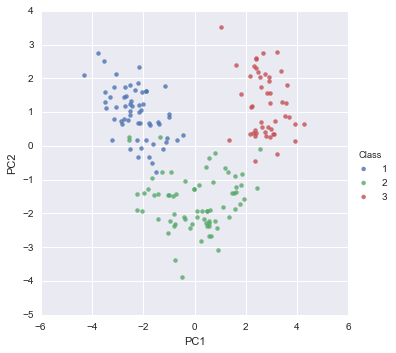

In [50]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

The scatterplot shows the first principal component on the x-axis, and the second principal component on the y-axis. We can see from the scatterplot that wine samples of cultivar 1 have much lower values of the first principal component than wine samples of cultivar 3. Therefore, the first principal component separates wine samples of cultivars 1 from those of cultivar 3.

We can also see that wine samples of cultivar 2 have much higher values of the second principal component than wine samples of cultivars 1 and 3. Therefore, the second principal component separates samples of cultivar 2 from samples of cultivars 1 and 3.

Therefore, the first two principal components are reasonably useful for distinguishing wine samples of the three different cultivars.

Above, we interpreted the first principal component as a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5. We can check whether this makes sense in terms of the concentrations of these chemicals in the different cultivars, by printing out the means of the standardised concentration variables in each cultivar, using the `printMeanAndSdByGroup()` function (see above):

In [51]:
printMeanAndSdByGroup(standardisedX, y);

## Means:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.919195,-0.292342,0.325604,-0.737997,0.463226,0.873362,0.956884,-0.578985,0.540383,0.203401,0.458847,0.771351,1.174501
2,-0.891720,-0.362362,-0.444958,0.223137,-0.364567,-0.058067,0.051780,0.014569,0.069002,-0.852799,0.433611,0.245294,-0.724110
3,0.189159,0.895331,0.257945,0.577065,-0.030127,-0.987617,-1.252761,0.690119,-0.766287,1.011418,-1.205382,-1.310950,-0.372578



## Standard deviations:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.565989,0.612825,0.823302,0.758115,0.730892,0.538506,0.395674,0.559639,0.715905,0.531210,0.506699,0.500058,0.699428
2,0.659832,0.905196,1.144991,0.998777,1.168006,0.867674,0.703493,0.991797,1.047418,0.397269,0.884060,0.696425,0.497100
3,0.648130,0.966347,0.668036,0.670991,0.756649,0.565996,0.291583,0.989818,0.708814,0.989176,0.496834,0.380317,0.362688



## Sample sizes:


,0
V1,
1,59
2,71
3,48


Does it make sense that the first principal component can separate cultivar 1 from cultivar 3? In cultivar 1, the mean values of V8 (0.954), V7 (0.871), V13 (0.769), V10 (0.539), V12 (0.458) and V14 (1.171) are very high compared to the mean values of V9 (-0.577), V3 (-0.292) and V5 (-0.736). In cultivar 3, the mean values of V8 (-1.249), V7 (-0.985), V13 (-1.307), V10 (-0.764), V12 (-1.202) and V14 (-0.372) are very low compared to the mean values of V9 (0.688), V3 (0.893) and V5 (0.575). Therefore, it does make sense that principal component 1 is a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5; and that principal component 1 can separate cultivar 1 from cultivar 3.

Above, we intepreted the second principal component as a contrast between the concentrations of V11, V2, V14, V4, V6 and V3, and the concentration of V12. In the light of the mean values of these variables in the different cultivars, does it make sense that the second principal component can separate cultivar 2 from cultivars 1 and 3? In cultivar 1, the mean values of V11 (0.203), V2 (0.917), V14 (1.171), V4 (0.325), V6 (0.462) and V3 (-0.292) are not very different from the mean value of V12 (0.458). In cultivar 3, the mean values of V11 (1.009), V2 (0.189), V14 (-0.372), V4 (0.257), V6 (-0.030) and V3 (0.893) are also not very different from the mean value of V12 (-1.202). In contrast, in cultivar 2, the mean values of V11 (-0.850), V2 (-0.889), V14 (-0.722), V4 (-0.444), V6 (-0.364) and V3 (-0.361) are much less than the mean value of V12 (0.432). Therefore, it makes sense that principal component is a contrast between the concentrations of V11, V2, V14, V4, V6 and V3, and the concentration of V12; and that principal component 2 can separate cultivar 2 from cultivars 1 and 3.

## Linear Discriminant Analysis

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the wine data set, we have 13 chemical concentrations describing wine samples from three cultivars. By carrying out a principal component analysis, we found that most of the variation in the chemical concentrations between the samples can be captured using the first two principal components, where each of the principal components is a particular linear combination of the 13 chemical concentrations.

The purpose of linear discriminant analysis (LDA) is to find the linear combinations of the original variables (the 13 chemical concentrations here) that gives the best possible separation between the groups (wine cultivars here) in our data set. *Linear discriminant analysis* is also known as *canonical discriminant analysis*, or simply *discriminant analysis*.

If we want to separate the wines by cultivar, the wines come from three different cultivars, so the number of groups (G) is 3, and the number of variables is 13 (13 chemicals’ concentrations; p = 13). The maximum number of useful discriminant functions that can separate the wines by cultivar is the minimum of G-1 and p, and so in this case it is the minimum of 2 and 13, which is 2. Thus, we can find at most 2 useful discriminant functions to separate the wines by cultivar, using the 13 chemical concentration variables.

You can carry out a linear discriminant analysis by using the `LinearDiscriminantAnalysis` class model from the module `sklearn.discriminant_analysis` and using its method `fit()` to fit our `X, y` data.

For example, to carry out a linear discriminant analysis using the 13 chemical concentrations in the wine samples, we type:

In [52]:
lda = LinearDiscriminantAnalysis().fit(X, y)

### Loadings for the Discriminant Functions

The values of the loadings of the discriminant functions for the wine data are stored in the `scalings_` member of the `lda` object model. For a pretty print we can type:

In [53]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1,LD2
V2,-0.403400,0.871793
V3,0.165255,0.305380
V4,-0.369075,2.345850
V5,0.154798,-0.146381
V6,-0.002163,-0.000463
V7,0.618052,-0.032213
V8,-1.661191,-0.491998
V9,-1.495818,-1.630954
V10,0.134093,-0.307088
V11,0.355056,0.253231


This means that the first discriminant function is a linear combination of the variables:
```
-0.403*V2 + 0.165*V3 - 0.369*V4 + 0.155*V5 - 0.002*V6 + 0.618*V7 - 1.661*V8 - 1.496*V9 + 0.134*V10 + 0.355*V11 - 0.818*V12 - 1.158*V13 - 0.003*V14
```
where V2, V3, ..., V14 are the concentrations of the 14 chemicals found in the wine samples. For convenience, the value for each discriminant function (eg. the first discriminant function) are scaled so that their mean value is zero (see below).

Note that these loadings are calculated so that the within-group variance of each discriminant function for each group (cultivar) is equal to 1, as will be demonstrated below.

As mentioned above, these scalings are stored in the named member `scalings_` of the object variable returned by `LinearDiscriminantAnalysis().fit(X, y)`. This element contains a numpy array, in which the first column contains the loadings for the first discriminant function, the second column contains the loadings for the second discriminant function and so on. For example, to extract the loadings for the first discriminant function, we can type:

In [54]:
lda.scalings_[:, 0]

array([-0.40339978,  0.1652546 , -0.36907526,  0.15479789, -0.0021635 ,
        0.61805207, -1.66119123, -1.49581844,  0.13409263,  0.35505571,
       -0.81803607, -1.15755938, -0.00269121])

Or for "prettier" print, use the dataframe variable created above:

In [55]:
pretty_scalings_.LD1

V2    -0.403400
V3     0.165255
V4    -0.369075
V5     0.154798
V6    -0.002163
V7     0.618052
V8    -1.661191
V9    -1.495818
V10    0.134093
V11    0.355056
V12   -0.818036
V13   -1.157559
V14   -0.002691
Name: LD1, dtype: float64

To calculate the values of the first discriminant function, we can define our own function `calclda()`:

In [56]:
def calclda(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the discriminant function
    ld = np.zeros(numsamples)
    # calculate the value of the discriminant function for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        ld[i] = valuei
    # standardise the discriminant function so that its mean value is 0:
    ld = scale(ld, with_std=False)
    return ld

The function `calclda()` simply calculates the value of a discriminant function for each sample in the data set, for example, for the first disriminant function, for each sample we calculate the value using the equation:

```
-0.403*V2 - 0.165*V3 - 0.369*V4 + 0.155*V5 - 0.002*V6 + 0.618*V7 - 1.661*V8 - 1.496*V9 + 0.134*V10 + 0.355*V11 - 0.818*V12 - 1.158*V13 - 0.003*V14
```

Furthermore, the `scale()` command is used within the `calclda()` function in order to standardise the value of a discriminant function (eg. the first discriminant function) so that its mean value (over all the wine samples) is 0.

We can use the function `calclda()` to calculate the values of the first discriminant function for each sample in our wine data:

In [57]:
calclda(X, lda.scalings_[:, 0])

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In fact, the values of the first linear discriminant function can be calculated using the `transform(X)` or `fit_transform(X, y)` methods of the LDA object, so we can compare those to the ones that we calculated, and they should agree:

In [58]:
# Try either, they produce the same result, use help() for more info
# lda.transform(X)[:, 0]
lda.fit_transform(X, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

We see that they do agree.

It doesn’t matter whether the input variables for linear discriminant analysis are standardised or not, unlike for principal components analysis in which it is often necessary to standardise the input variables. However, using standardised variables in linear discriminant analysis makes it easier to interpret the loadings in a linear discriminant function.

In linear discriminant analysis, the standardised version of an input variable is defined so that it has mean zero and within-groups variance of 1. Thus, we can calculate the “group-standardised” variable by subtracting the mean from each value of the variable, and dividing by the within-groups standard deviation. To calculate the group-standardised version of a set of variables, we can use the function `groupStandardise()` below:

In [59]:
def groupStandardise(variables, groupvariable):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # find the variable names
    variablenames = variables.columns
    # calculate the group-standardised version of each variable
    variables_new = pd.DataFrame()
    for i in range(numvariables):
        variable_name = variablenames[i]
        variablei = variables[variable_name]
        variablei_Vw = calcWithinGroupsVariance(variablei, groupvariable)
        variablei_mean = np.mean(variablei)
        variablei_new = (variablei - variablei_mean)/(np.sqrt(variablei_Vw))
        variables_new[variable_name] = variablei_new
    return variables_new

For example, we can use the `groupStandardise()` function to calculate the group-standardised versions of the chemical concentrations in wine samples:

In [60]:
groupstandardisedX = groupStandardise(X, y)

We can then use the `LinearDiscriminantAnalysis().fit()` method to perform linear disriminant analysis on the group-standardised variables:

In [61]:
lda2 = LinearDiscriminantAnalysis().fit(groupstandardisedX, y)
pretty_scalings(lda2, groupstandardisedX)

,LD1,LD2
V2,-0.206505,0.446280
V3,0.155686,0.287697
V4,-0.094869,0.602989
V5,0.438021,-0.414204
V6,-0.029079,-0.006220
V7,0.270302,-0.014088
V8,-0.870673,-0.257869
V9,-0.163255,-0.178004
V10,0.066531,-0.152364
V11,0.536701,0.382783


It makes sense to interpret the loadings calculated using the group-standardised variables rather than the loadings for the original (unstandardised) variables.

In the first discriminant function calculated for the group-standardised variables, the largest loadings (in absolute) value are given to V8 (-0.871), V11 (0.537), V13 (-0.464), V14 (-0.464), and V5 (0.438). The loadings for V8, V13 and V14 are negative, while those for V11 and V5 are positive. Therefore, the discriminant function seems to represent a contrast between the concentrations of V8, V13 and V14, and the concentrations of V11 and V5.

We saw above that the individual variables which gave the greatest separations between the groups were V8 (separation 233.93), V14 (207.92), V13 (189.97), V2 (135.08) and V11 (120.66). These were mostly the same variables that had the largest loadings in the linear discriminant function (loading for V8: -0.871, for V14: -0.464, for V13: -0.464, for V11: 0.537).

We found above that variables V8 and V11 have a negative between-groups covariance (-60.41) and a positive within-groups covariance (0.29). When the between-groups covariance and within-groups covariance for two variables have opposite signs, it indicates that a better separation between groups can be obtained by using a linear combination of those two variables than by using either variable on its own.

Thus, given that the two variables V8 and V11 have between-groups and within-groups covariances of opposite signs, and that these are two of the variables that gave the greatest separations between groups when used individually, it is not surprising that these are the two variables that have the largest loadings in the first discriminant function.

Note that although the loadings for the group-standardised variables are easier to interpret than the loadings for the unstandardised variables, the values of the discriminant function are the same regardless of whether we standardise the input variables or not. For example, for wine data, we can calculate the value of the first discriminant function calculated using the unstandardised and group-standardised variables by typing:

In [62]:
lda.fit_transform(X, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In [63]:
lda2.fit_transform(groupstandardisedX, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

We can see that although the loadings are different for the first discriminant functions calculated using unstandardised and group-standardised data, the actual values of the first discriminant function are the same.

### Separation Achieved by the Discriminant Functions

To calculate the separation achieved by each discriminant function, we first need to calculate the value of each discriminant function, by substituting the values of the variables into the linear combination for the discriminant function (eg. `-0.403*V2 - 0.165*V3 - 0.369*V4 + 0.155*V5 - 0.002*V6 + 0.618*V7 - 1.661*V8 - 1.496*V9 + 0.134*V10 + 0.355*V11 - 0.818*V12 - 1.158*V13 - 0.003*V14` for the first discriminant function), and then scaling the values of the discriminant function so that their mean is zero.

As mentioned above, we can do this using the `rpredict()` function which simulates the output of the `predict()` function in R. For example, to calculate the value of the discriminant functions for the wine data, we type:

In [64]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values = rpredict(lda, standardisedX, y, True)

class
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '3' '3' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '3' '3' '3' '3' '3' '3' '3' '2' '2' '2' '3' '2' '3' '3' '2' '2'
 '2' '2' '3' '2' '3' '3' '3' '3' '2' '2' '3' '3' '3' '3' '2' '3']

posterior
                1         2         3
0    1.344367e-22  0.999236  0.000764
1    4.489007e-27  0.983392  0.016608
2    2.228888e-24  0.791616  0.208384
3    1.026755e-24  0.500161  0.499839
4    6.371860e-23  0.790657  0.209343
5    1.552082e-24  0.981986  0.0

The returned variable has a named element `x` which is a matrix containing the linear discriminant functions: the first column of `x` contains the first discriminant function, the second column of `x` contains the second discriminant function, and so on (if there are more discriminant functions).

We can therefore calculate the separations achieved by the two linear discriminant functions for the wine data by using the `calcSeparations()` function (see above), which calculates the separation as the ratio of the between-groups variance to the within-groups variance:

In [65]:
calcSeparations(lda_values["x"], y)

variable LD1 Vw= 1.0 Vb= 794.652200566 separation= 794.652200566
variable LD2 Vw= 1.0 Vb= 361.241041493 separation= 361.241041493


As mentioned above, the loadings for each discriminant function are calculated in such a way that the within-group variance (`Vw`) for each group (wine cultivar here) is equal to 1, as we see in the output from `calcSeparations()` above.

The output from `calcSeparations()` tells us that the separation achieved by the first (best) discriminant function is 794.7, and the separation achieved by the second (second best) discriminant function is 361.2.

Therefore, the total separation is the sum of these, which is (`794.652200566216+361.241041493455=1155.893`) 1155.89, rounded to two decimal places. Therefore, the *percentage separation* achieved by the first discriminant function is (`794.652200566216*100/1155.893=`) 68.75%, and the percentage separation achieved by the second discriminant function is (`361.241041493455*100/1155.893=`) 31.25%.

The *proportion of trace* (as reported in R by the `lda()` model) is the percentage separation achieved by each discriminant function. For example, for the wine data we get the same values as just calculated (68.75% and 31.25%). Note that in `sklearn` the proportion of trace is reported as `explained_variance_ratio_` in a `LinearDiscriminantAnalysis` model and is computed only for an "eigen" solver, while so far we have been using the default one, which is "svd" (Singular Value Decomposition):

In [66]:
def proportion_of_trace(lda):
    ret = pd.DataFrame([round(i, 4) for i in lda.explained_variance_ratio_ if round(i, 4) > 0], columns=["ExplainedVariance"])
    ret.index = ["LD"+str(i+1) for i in range(ret.shape[0])]
    ret = ret.transpose()
    print("Proportion of trace:")
    print(ret.to_string(index=False))
    return ret

proportion_of_trace(LinearDiscriminantAnalysis(solver="eigen").fit(X, y));

Proportion of trace:
    LD1     LD2
 0.6875  0.3125


Therefore, the first discriminant function does achieve a good separation between the three groups (three cultivars), but the second discriminant function does improve the separation of the groups by quite a large amount, so is it worth using the second discriminant function as well. Therefore, to achieve a good separation of the groups (cultivars), it is necessary to use both of the first two discriminant functions.

We found above that the largest separation achieved for any of the individual variables (individual chemical concentrations) was 233.9 for V8, which is quite a lot less than 794.7, the separation achieved by the first discriminant function. Therefore, the effect of using more than one variable to calculate the discriminant function is that we can find a discriminant function that achieves a far greater separation between groups than achieved by any one variable alone.

### A Stacked Histogram of the LDA Values

A nice way of displaying the results of a linear discriminant analysis (LDA) is to make a stacked histogram of the values of the discriminant function for the samples from different groups (different wine cultivars in our example).

We can do this using the `ldahist()` function defined below.

In [67]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel("group"+str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

For example, to make a stacked histogram of the first discriminant function’s values for wine samples of the three different wine cultivars, we type:

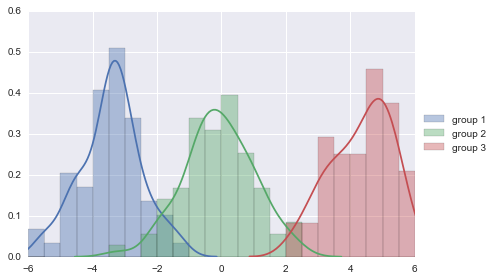

In [68]:
ldahist(lda_values["x"].LD1, y)

We can see from the histogram that cultivars 1 and 3 are well separated by the first discriminant function, since the values for the first cultivar are between -6 and -1, while the values for cultivar 3 are between 2 and 6, and so there is no overlap in values.

However, the separation achieved by the linear discriminant function on the training set may be an overestimate. To get a more accurate idea of how well the first discriminant function separates the groups, we would need to see a stacked histogram of the values for the three cultivars using some unseen “test set”, that is, using a set of data that was not used to calculate the linear discriminant function.

We see that the first discriminant function separates cultivars 1 and 3 very well, but does not separate cultivars 1 and 2, or cultivars 2 and 3, so well.

We therefore investigate whether the second discriminant function separates those cultivars, by making a stacked histogram of the second discriminant function’s values:

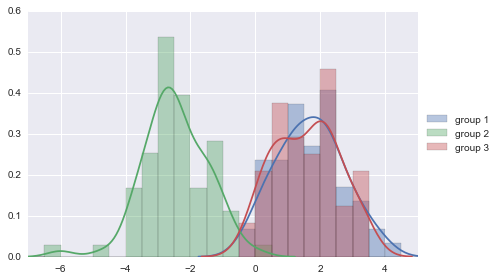

In [69]:
ldahist(lda_values["x"].LD2, y)

We see that the second discriminant function separates cultivars 1 and 2 quite well, although there is a little overlap in their values. Furthermore, the second discriminant function also separates cultivars 2 and 3 quite well, although again there is a little overlap in their values so it is not perfect.

Thus, we see that two discriminant functions are necessary to separate the cultivars, as was discussed above (see the discussion of percentage separation above).

### Scatterplots of the Discriminant Functions

We can obtain a scatterplot of the best two discriminant functions, with the data points labelled by cultivar, by typing:

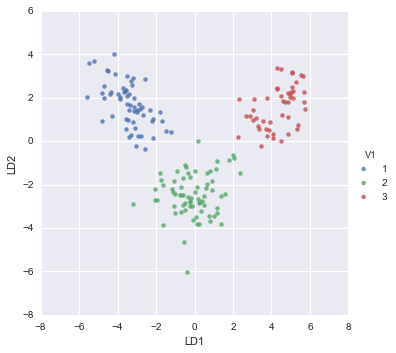

In [70]:
sns.lmplot("LD1", "LD2", lda_values["x"].join(y), hue="V1", fit_reg=False);

From the scatterplot of the first two discriminant functions, we can see that the wines from the three cultivars are well separated in the scatterplot. The first discriminant function (x-axis) separates cultivars 1 and 3 very well, but doesn’t not perfectly separate cultivars 1 and 3, or cultivars 2 and 3.

The second discriminant function (y-axis) achieves a fairly good separation of cultivars 1 and 3, and cultivars 2 and 3, although it is not totally perfect.

To achieve a very good separation of the three cultivars, it would be best to use both the first and second discriminant functions together, since the first discriminant function can separate cultivars 1 and 3 very well, and the second discriminant function can separate cultivars 1 and 2, and cultivars 2 and 3, reasonably well.

### Allocation Rules and Misclassification Rate

We can calculate the mean values of the discriminant functions for each of the three cultivars using the `printMeanAndSdByGroup()` function (see above):

In [71]:
printMeanAndSdByGroup(lda_values["x"], y);

## Means:


,LD1,LD2
V1,,
1,-3.422489,1.691674
2,-0.079726,-2.472656
3,4.324737,1.578120



## Standard deviations:


,LD1,LD2
V1,,
1,0.931467,1.008978
2,1.076271,0.990268
3,0.930571,0.971586



## Sample sizes:


,0
V1,
1,59
2,71
3,48


We find that the mean value of the first discriminant function is -3.42248851 for cultivar 1, -0.07972623 for cultivar 2, and 4.32473717 for cultivar 3. The mid-way point between the mean values for cultivars 1 and 2 is (-3.42248851-0.07972623)/2=-1.751107, and the mid-way point between the mean values for cultivars 2 and 3 is (-0.07972623+4.32473717)/2 = 2.122505.

Therefore, we can use the following allocation rule:
* if the first discriminant function is <= -1.751107, predict the sample to be from cultivar 1
* if the first discriminant function is > -1.751107 and <= 2.122505, predict the sample to be from cultivar 2
* if the first discriminant function is > 2.122505, predict the sample to be from cultivar 3

We can examine the accuracy of this allocation rule by using the `calcAllocationRuleAccuracy()` function below:

In [72]:
def calcAllocationRuleAccuracy(ldavalue, groupvariable, cutoffpoints):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    confusion_matrix = []
    # calculate the number of true positives and false negatives for each group
    for i, leveli in enumerate(levels):
        levelidata = ldavalue[groupvariable==leveli]
        row = []
        # see how many of the samples from this group are classified in each group
        for j, levelj in enumerate(levels):
            if j == 0:
                cutoff1 = cutoffpoints[0]
                cutoff2 = "NA"
                results = (levelidata <= cutoff1).value_counts()
            elif j == numlevels-1:
                cutoff1 = cutoffpoints[numlevels-2]
                cutoff2 = "NA"
                results = (levelidata > cutoff1).value_counts()
            else:
                cutoff1 = cutoffpoints[j-1]
                cutoff2 = cutoffpoints[j]
                results = ((levelidata > cutoff1) & (levelidata <= cutoff2)).value_counts()
            try:
                trues = results[True]
            except KeyError:
                trues = 0
            print("Number of samples of group", leveli, "classified as group", levelj, ":", trues, "(cutoffs:", cutoff1, ",", cutoff2, ")")
            row.append(trues)
        confusion_matrix.append(row)
    return confusion_matrix

For example, to calculate the accuracy for the wine data based on the allocation rule for the first discriminant function, we type:

In [73]:
confusion_matrix = calcAllocationRuleAccuracy(lda_values["x"].iloc[:, 0], y, [-1.751107, 2.122505])

Number of samples of group 1 classified as group 1 : 56 (cutoffs: -1.751107 , NA )
Number of samples of group 1 classified as group 2 : 3 (cutoffs: -1.751107 , 2.122505 )
Number of samples of group 1 classified as group 3 : 0 (cutoffs: 2.122505 , NA )
Number of samples of group 2 classified as group 1 : 5 (cutoffs: -1.751107 , NA )
Number of samples of group 2 classified as group 2 : 65 (cutoffs: -1.751107 , 2.122505 )
Number of samples of group 2 classified as group 3 : 1 (cutoffs: 2.122505 , NA )
Number of samples of group 3 classified as group 1 : 0 (cutoffs: -1.751107 , NA )
Number of samples of group 3 classified as group 2 : 0 (cutoffs: -1.751107 , 2.122505 )
Number of samples of group 3 classified as group 3 : 48 (cutoffs: 2.122505 , NA )


This can be displayed in a *confusion matrix*:

In [74]:
def webprint_confusion_matrix(confusion_matrix, classes_names):
    display(pd.DataFrame(confusion_matrix, index=["Is group "+i for i in classes_names], columns=["Allocated to group "+i for i in classes_names]))

webprint_confusion_matrix(confusion_matrix, lda.classes_)

,Allocated to group 1,Allocated to group 2,Allocated to group 3
Is group 1,56,3,0
Is group 2,5,65,1
Is group 3,0,0,48


There are 3+5+1=9 wine samples that are misclassified, out of (56+3+5+65+1+48=) 178 wine samples: 3 samples from cultivar 1 are predicted to be from cultivar 2, 5 samples from cultivar 2 are predicted to be from cultivar 1, and 1 sample from cultivar 2 is predicted to be from cultivar 3. Therefore, the misclassification rate is 9/178, or 5.1%. The misclassification rate is quite low, and therefore the accuracy of the allocation rule appears to be relatively high.

However, this is probably an underestimate of the misclassification rate, as the allocation rule was based on this data (this is the *training set*). If we calculated the misclassification rate for a separate *test set* consisting of data other than that used to make the allocation rule, we would probably get a higher estimate of the misclassification rate.

#### The Python way

Python allows to do all the above in a much faster way and providing extended automatic report capabilities by using the `sklearn.metrics` module. The above confusion matrix and reporting typical performance metrics, such as *precision*, *recall*, *f1-score* can be done in python as follows:

In [75]:
import sklearn.metrics as metrics

def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]
    
y_pred = lda_values["x"].iloc[:, 0].apply(lda_classify, args=(lda.classes_, [-1.751107, 2.122505],)).values
y_true = y

             precision    recall  f1-score   support

          1       0.92      0.95      0.93        59
          2       0.96      0.92      0.94        71
          3       0.98      1.00      0.99        48

avg / total       0.95      0.95      0.95       178



,Allocated to group 1,Allocated to group 2,Allocated to group 3
Is group 1,56,3,0
Is group 2,5,65,1
Is group 3,0,0,48


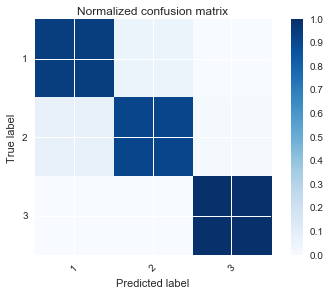

In [76]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(metrics.classification_report(y_true, y_pred))
cm = metrics.confusion_matrix(y_true, y_pred)
webprint_confusion_matrix(cm, lda.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, lda.classes_, title='Normalized confusion matrix')

## Links and Further Reading

Here are some info and links for further reading.

To learn about multivariate analysis I would recommend the following:
* [Multivariate Data Analysis](http://www.bookbutler.co.uk/compare?isbn=9781292021904) by Hair et. al.
* [Applied Multivariate Data Analysis](http://www.bookbutler.co.uk/compare?isbn=9780340741221) by Everitt and Dunn.

If you are new to python then you can read one of the overwhelming number of tutorials that exist on the web. Here are a couple of links:
* The [official tutorial](https://docs.python.org/2/tutorial/) by the Python organization. Extensive covering pretty much everything in core python and with lots of detailed non-interactive examples.
* For those that prefer learning by doing through interactive tutorials here are some good ones I would recommend:
    * [Codeacademy Python tutorial](https://www.codecademy.com/learn/python)
    * [learnpython.org](http://www.learnpython.org)

To learn about data analysis and data science using the Python ecosystem I would recommend the following:
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney
* [Data Science from Scratch](http://shop.oreilly.com/product/0636920033400.do) by Joel Grus

To learn about doing machine learning in Python using scikit-learn I would recommend:
* The [scikit-learn homepage](http://scikit-learn.org) not only has excellent documentation and examples, but also provides useful and clear resources about machine learning methods.
* [Python Machine Learning](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning) by Sebastian Raschka

The visualizations here were produced using [matplotlib](http://matplotlib.org) and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/). Their homepages have extensive documentation about their APIs and tons of examples.

Although Python is self-sufficient, fairly extensive and probably growing more rapidly than any other scientific language, if the need arises that you need to use R for whatever reason, then you are able to do so within Python itself via the [`rpy2` library](http://rpy2.readthedocs.org). 

## Acknowledgements

I would like to thank [Avril Coghlan](http://www.sanger.ac.uk/research/projects/parasitegenomics/), Wellcome Trust Sanger Institute, Cambridge, U.K. for her excellent resource [A Little Book of R for Multivariate Analysis](https://little-book-of-r-for-multivariate-analysis.readthedocs.org) and releasing it under a [CC-BY-3.0 License](https://creativecommons.org), hence, allowing this translation from R to Python. All kudos to her.

As the original, many of the examples in this booklet are inspired by examples in the Open University book, "Multivariate Analysis" (product code M249/03).

I am also grateful to the UCI Machine Learning Repository, http://archive.ics.uci.edu/ml, for making data sets available which were used in the examples in this booklet.

## Contact

I will be grateful if you will send me ([Yiannis Gatsoulis](http://gats.me)) corrections or suggestions for improvements to my email address [gatsoulis AT gmail DOT com](mailto:gatsoulis@gmail.com).

## License

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">A Little Book of Python for Multivariate Analysis</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Yiannis Gatsoulis</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://little-book-of-r-for-multivariate-analysis.readthedocs.org/en/latest/src/multivariateanalysis.html" rel="dct:source">A Little Book of R for Multivariate Analysis</a> by Avril Coghlan licensed under [CC-BY-3.0](http://creativecommons.org/licenses/by/3.0/).